In [1]:
# There is a file with the same name of this lab but (HARDWARE) in title for using CW-Nano/CW-Lite/CW-Pro
# There is a file with the same name of this lab but (SIMULATED) in title for using recorded data
#raise NotImplementedError("Insert code from (HARDWARE) or (SIMULATED) Notebook Here")
import numpy as np
from tqdm import tnrange

trace_num = 20000

data_path = '/home/mabon/mabon/old/New_analysis/STM32F/TARGET_2/CWP/trace_plaintext_key.npz'
whole_pack = np.load(data_path)

try:
    trace_array, textin_array, key,key2 = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key'],whole_pack['true_key']
except Exception:
    trace_array, textin_array, key,key2 = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key'],whole_pack['true_key']
trace_array = trace_array[:trace_num, :]
textin_array = textin_array[:trace_num, :]
print(trace_array.shape)
print(textin_array.shape)

hex_key = [hex(b_val) for b_val in key]
print(hex_key)


(20000, 5000)
(20000, 16)
['0x84', '0x64', '0x1e', '0xf8', '0xec', '0xf1', '0x67', '0xc9', '0xd8', '0x5', '0x76', '0x18', '0x80', '0x51', '0xf', '0xc0']


In [2]:
# try:
#     trace_array, textin_array, key = whole_pack['trace_mat'], whole_pack['textin_mat'], whole_pack['key']
# except Exception:
#     trace_array, textin_array, key = whole_pack['trace_mat'], whole_pack['textin_mat'], whole_pack['key']

In [3]:

# try:
#     trace_array, textin_array, key = whole_pack['power_trace'], whole_pack['plain_text'], whole_pack['key']
# except Exception:
#     trace_array, textin_array, key = whole_pack['power_trace'], whole_pack['power_trace'], whole_pack['key']
# trace_array = trace_array[:trace_num, :]

In [4]:
assert len(trace_array) == trace_num
print("✔️ OK to continue!")

✔️ OK to continue!


<IPython.core.display.Javascript object>


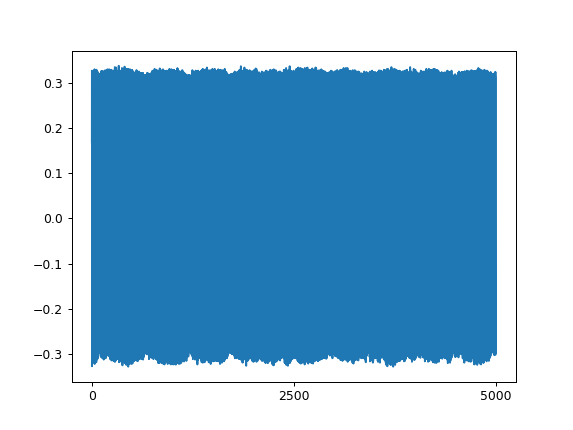

In [5]:
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib.pyplot import MultipleLocator

x_locator = MultipleLocator(2500)
ax = plt.gca()
ax.xaxis.set_major_locator(x_locator)

plt.plot(trace_array[0])

In [6]:
# ###################
# Add your code here
# ###################
# raise NotImplementedError("Add your code here, and delete this.")
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

def aes_internal(inputdata, key):
    key = int(key)
    inputdata = int(inputdata)
    return sbox[inputdata ^ key]

def calc_hamming_weight(n):
    return bin(n).count("1")

HW = []
for i in range(0, 256):
    hw_val = calc_hamming_weight(i)
    HW.append(hw_val)

In [7]:
assert HW[aes_internal(0xA1, 0x79)] == 3
assert HW[aes_internal(0x22, 0xB1)] == 5
print("✔️ OK to continue!")

✔️ OK to continue!


In [8]:
def mean(X):
    # raise NotImplementedError("Add your code here, and delete this.")
    return np.mean(X, axis=0)

def std_dev(X, X_bar):
    # raise NotImplementedError("Add your code here, and delete this.")
    mean_x = X - X_bar
    x_square = []
    for i in range(X.shape[0]):
        tmp = mean_x[i, :]
        tmp_2 = np.square(tmp)
        x_square.append(tmp_2)

    x_square = np.array(x_square)
    sum_x_square = np.sum(x_square, axis=0)
    x_sqrt = np.sqrt(sum_x_square)
    return x_sqrt
    
def cov(X, X_bar, Y, Y_bar):
    # raise NotImplementedError("Add your code here, and delete this.")
    mean_x = X - X_bar
    mean_y = Y - Y_bar
    product_x_y = mean_x * mean_y
    sum_res = np.sum(product_x_y, axis=0)
    return sum_res

In [9]:
a = np.array([[5, 3, 4, 4, 5, 6],
             [27, 2, 3, 4, 12, 6],
              [1, 3, 5, 4, 5, 6],
              [1, 2, 3, 4, 5, 6],
             ]).transpose()
a_bar = mean(a)
b = np.array([[5, 4, 3, 2, 1, 3]]).transpose()
b_bar = mean(b)

o_a = std_dev(a, a_bar)
o_b = std_dev(b, b_bar)

ab_cov = cov(a, a_bar, b, b_bar)

In [10]:
assert (a_bar == np.array([4.5, 9., 4., 3.5])).all()
assert (b_bar == np.array([3.])).all()
assert (o_a[3] > 4.1833001 and o_a[3] < 4.1833002)
assert (o_b[0] > 3.162277 and o_b[0] < 3.162278)
assert (ab_cov == np.array([-1., 28., -9., -10.])).all()
print("✔️ OK to continue!")

✔️ OK to continue!


In [11]:
print(trace_array)
print(trace_array.shape)

[[ 0.16796875  0.32617188 -0.13671875 ...  0.3232422  -0.12304688
  -0.2998047 ]
 [ 0.07226562  0.32128906 -0.08300781 ...  0.31835938 -0.07519531
  -0.3125    ]
 [ 0.06152344  0.3251953  -0.08203125 ...  0.3251953  -0.0625
  -0.3154297 ]
 ...
 [ 0.08691406  0.32617188 -0.10351562 ...  0.32128906 -0.1015625
  -0.328125  ]
 [ 0.15234375  0.32421875 -0.13671875 ...  0.3203125  -0.09765625
  -0.31835938]
 [ 0.08886719  0.32421875 -0.07910156 ...  0.3232422  -0.08984375
  -0.3173828 ]]
(20000, 5000)


In [12]:
maxcpa = [0] * 256

# we don't need to redo the mean and std dev calculations 
# for each key guess
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)

for kguess in tnrange(0, 256):
    hws = np.array([[HW[aes_internal(textin[0],kguess)] for textin in textin_array]]).transpose()
    
    # ###################
    # Add your code here
    hws_bar = mean(hws)
    o_hws = std_dev(hws, hws_bar)
    correlation = cov(trace_array, t_bar, hws, hws_bar)
    cpaoutput = correlation / (o_t * o_hws)
    maxcpa[kguess] = max(abs(cpaoutput))

guess = np.argmax(maxcpa)
guess_corr = max(maxcpa)
    # ###################
    #raise NotImplementedError("Add your code here, and delete this.")

print("Key guess: ", hex(guess))
print("Correlation: ", guess_corr)
print("Correct Key: ", hex_key[0])

/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


  0%|          | 0/256 [00:00<?, ?it/s]

Key guess:  0x11
Correlation:  0.03476707773352769
Correct Key:  0x84


In [13]:
print(hex_key)

['0x84', '0x64', '0x1e', '0xf8', '0xec', '0xf1', '0x67', '0xc9', '0xd8', '0x5', '0x76', '0x18', '0x80', '0x51', '0xf', '0xc0']


In [14]:
t_bar = np.sum(trace_array, axis=0)/len(trace_array)
o_t = np.sqrt(np.sum((trace_array - t_bar)**2, axis=0))

cparefs = [0] * 16 #put your key byte guess correlations here
bestguess = [0] * 16 #put your key byte guesses here

for bnum in tnrange(0, 16):
    maxcpa = [0] * 256
    for kguess in range(0, 256):
        # ###################
        # Add your code here
        hws = np.array([[HW[aes_internal(textin[bnum],kguess)] for textin in textin_array]]).transpose()
        hws_bar = mean(hws)
        o_hws = std_dev(hws, hws_bar)
        correlation = cov(trace_array, t_bar, hws, hws_bar)
        cpaoutput = correlation / (o_t * o_hws)
        maxcpa[kguess] = max(abs(cpaoutput))
    
    cparefs[bnum] = max(maxcpa)
    bestguess[bnum] = np.argmax(maxcpa)
        # ###################
        # raise NotImplementedError("Add your code here, and delete this.")

print("Best Key Guess: ", end="")
for b in bestguess:
    print("%02x " % b, end="")
print("\n", cparefs)

/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  import sys


  0%|          | 0/16 [00:00<?, ?it/s]

Best Key Guess: 11 4b 1e fe 3b 72 08 f9 d8 05 4f 18 f8 4b 0d 32 
 [0.03476707773352769, 0.0368977661948423, 0.03229985088993245, 0.033917126944404144, 0.03546680017768119, 0.03414535232411962, 0.03592105643681533, 0.03740095769917876, 0.037297494611573, 0.046552506350570615, 0.0347984952772126, 0.045286437180802656, 0.035898123677439636, 0.03483842440634132, 0.03323895066449352, 0.03314311481364204]


In [15]:
hex_key = [x[2:] for x in hex_key]
print(hex_key)

['84', '64', '1e', 'f8', 'ec', 'f1', '67', 'c9', 'd8', '5', '76', '18', '80', '51', 'f', 'c0']


In [16]:
for bnum in range(16):
    assert bestguess[bnum] == key[bnum], \
    "Byte {} failed, expected {:02X} got {:02X}".format(bnum, key[bnum], bestguess[bnum])
print("✔️ OK to continue!")

AssertionError: Byte 0 failed, expected 84 got 11

In [ ]:
key

In [ ]:
bestguess